2


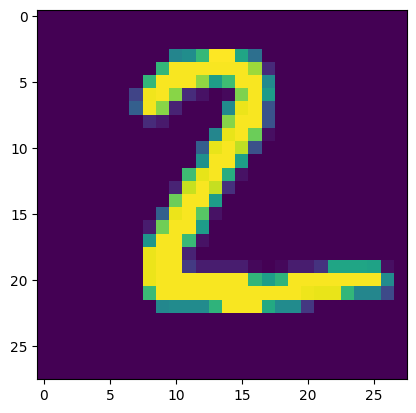

In [42]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

train_images_path = 'dataset/train-images.idx3-ubyte'
train_labels_path = 'dataset/train-labels.idx1-ubyte'
test_images_path = 'dataset/t10k-images.idx3-ubyte'
test_labels_path = 'dataset/t10k-labels.idx1-ubyte'

# Carregar o conjunto de treino para avaliação
arr_images_train = idx2numpy.convert_from_file(train_images_path)
arr_labels_train = idx2numpy.convert_from_file(train_labels_path).astype(int)

# Carregar o conjunto de teste para avaliação
arr_images_test = idx2numpy.convert_from_file(test_images_path)
arr_labels_test = idx2numpy.convert_from_file(test_labels_path).astype(int)

example = np.asarray(arr_images_test[1]).squeeze()
plt.imshow(example)

print(arr_labels_test[1])

In [43]:
print(arr_images_train.shape, arr_labels_train.shape)

(60000, 28, 28) (60000,)


In [44]:
# Transformar as imagens em vetores e normalizá-las
X_train = arr_images_train.reshape(arr_images_train.shape[0], -1)
X_test = arr_images_test.reshape(arr_images_test.shape[0], -1)

# Adicionar uma coluna de 1s para considerar o termo de bias (intercept) no modelo linear
X_train = np.column_stack((X_train, np.ones(X_train.shape[0])))
X_test = np.column_stack((X_test, np.ones(X_test.shape[0])))

# Colocar y em formato de vetor (one hot)
def one_hot_convert(vec):
    matrix = []
    for idx in vec:
      m = np.zeros((10, 1))
      m[idx] = 1
      matrix.append(m)
    return np.array(matrix)

y_train = one_hot_convert(arr_labels_train).reshape(arr_labels_train.shape[0], -1)
y_test = arr_labels_test.reshape(arr_labels_test.shape[0], -1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 785) (60000, 10)
(10000, 785) (10000, 1)


In [45]:
# Funções de ativação para o neurônio
def activate_functions(type, matrix):
    if type == 'sigmoid':
        return 1 / (1 + np.exp(-matrix))
    elif type == 'tanh':
        return np.tanh(z)

# Função de treino para o classificador perceptron logístico
def train_logistic_perceptron(X, y, epochs, l_rate):
    weights = np.random.randn(y.shape[1], X.shape[1]) # Matriz com dimensões: num_classes X num_atributos
    
    for epoch in range(epochs): # Iterando épocas
        print('Epoch: ', epoch)
        
        for i, x in enumerate(X_train): # Iterando neurônios
            z = weights @ x.T
            result = activate_functions('sigmoid', z)

            error = y[i] - result # Erro por classe

            # Ajustar os pesos para cada classe separadamente
            weights += l_rate * np.outer(error, x.T)

    return weights

# Treinar o classificador
weights = train_logistic_perceptron(X_train, y_train, epochs=300, l_rate=0.01)
print(weights.shape)

Epoch:  0


/tmp/ipykernel_12294/620546615.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-matrix))


Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  91
Epoch:  

In [46]:
# Função de predição usando o classificador linear
def predict_logistic_perceptron(X, W):
    y_pred = []
    for i, x in enumerate(X): # Iterando neurônios
        z = weights @ x.T
        result = activate_functions('sigmoid', z)

        # Converte as saídas para as classes preditas (0 a 9) usando a função argmax
        # A classe predita será o índice do valor máximo em cada linha
        classe = np.argmax(result, axis=0)

        y_pred.append(classe)

    return np.expand_dims(y_pred, axis=1)

# Realizar a predição no conjunto de teste
y_pred_test = predict_logistic_perceptron(X_test, weights)

print(y_pred_test.shape)
print(y_test.shape)

(10000, 1)
(10000, 1)


/tmp/ipykernel_12294/620546615.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-matrix))


In [47]:
# Avaliar o desempenho do classificador
error = (10000 - sum(y_pred_test == y_test)) / 10000 
print("Error rate: {}".format(error[0]))

Error rate: 0.2138
